# Kaggle - Titanic Dataset

## Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    raw_train = pd.read_csv('input/train.csv')
    raw_test = pd.read_csv('input/test.csv')
except FileNotFoundError:
    print("ERROR: You should put train.csv and test.csv files in the folder called input")


## Preview data

In [2]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
raw_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
222,223,0,3,"Green, Mr. George Henry",male,51.00,0,0,21440,8.0500,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.00,0,0,236852,13.0000,NaN,S
743,744,0,3,"McNamee, Mr. Neal",male,24.00,1,0,376566,16.1000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.00,0,0,248731,13.5000,NaN,S


### Features' types

In [4]:
#get features
print(raw_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


- **Numeric**: PassengerId, Age, Fare, SibSp, Parch
- **Categorical**: Survived, Name, Sex, Embarked, Pclass, Ticket

## Finding Duplicates

In [5]:
raw_train.duplicated().sum()

0

## Remove unecessary features

In [6]:
titanic_df = raw_train.drop(['PassengerId','Name','Ticket'], 1)

#get features
print(titanic_df.columns.values)

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Cabin' 'Embarked']


## Finding missing values

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


#### Embarked

In [8]:
#Embarked feature: possible values
titanic_df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [9]:
#Embarked feature: missing values
missing_embarked = titanic_df['Embarked'].isnull()
titanic_df[missing_embarked]

#Embarked feature: replace missing values with most common value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")


#### Age

In [10]:
missing_ages = titanic_df['Age'].isnull()
titanic_df[missing_ages]

average_age   = titanic_df["Age"].mean()
std_age       = titanic_df["Age"].std()
count_nan_age = titanic_df["Age"].isnull().sum()

#replace missing values with a random value between the average - std and average + std
rand = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand
titanic_df['Age'] = titanic_df['Age'].astype(int)

C:\Development\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


#### Cabin

In [11]:
missing_cabin = raw_train['Cabin'].isnull()
titanic_df[missing_cabin]

#lots of missing values -> remove Cabin feaure
titanic_df.drop(['Cabin'], 1)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
5,0,3,male,29,0,0,8.4583,Q
6,0,1,male,54,0,0,51.8625,S
7,0,3,male,2,3,1,21.0750,S
8,1,3,female,27,0,2,11.1333,S
9,1,2,female,14,1,0,30.0708,C


## Outliers

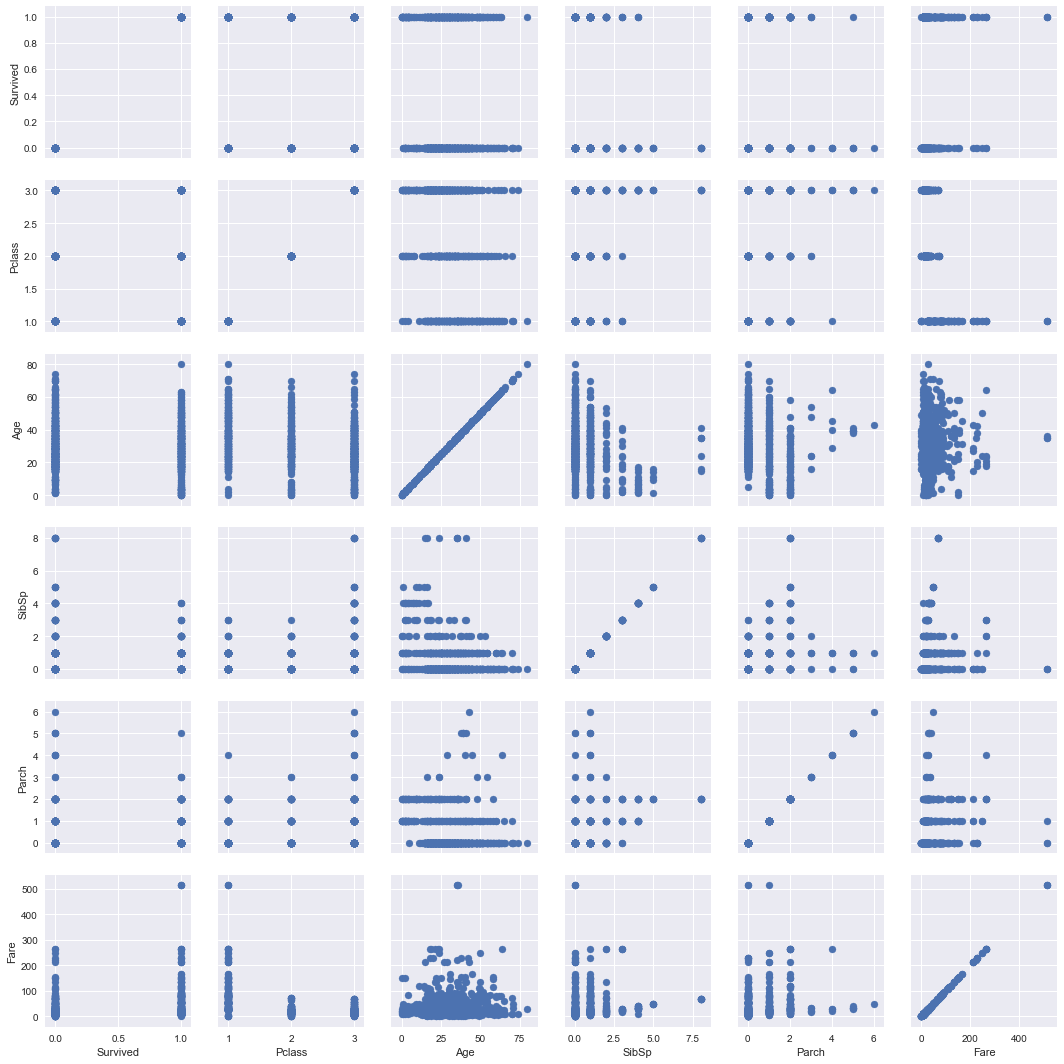

In [12]:
sns.PairGrid(titanic_df).map(plt.scatter)
plt.show()

In [13]:
#From the above plots it looks like there some outliers in Fare which can bias the model, let's analyze Fare
titanic_df.sort_values(by="Fare", ascending=False).head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,1,female,35,0,0,512.3292,NaN,C
737,1,1,male,35,0,0,512.3292,B101,C
679,1,1,male,36,0,1,512.3292,B51 B53 B55,C
88,1,1,female,23,3,2,263.0000,C23 C25 C27,S
27,0,1,male,19,3,2,263.0000,C23 C25 C27,S
341,1,1,female,24,3,2,263.0000,C23 C25 C27,S
438,0,1,male,64,1,4,263.0000,C23 C25 C27,S
311,1,1,female,18,2,2,262.3750,B57 B59 B63 B66,C
742,1,1,female,21,2,2,262.3750,B57 B59 B63 B66,C
118,0,1,male,24,0,1,247.5208,B58 B60,C


In [14]:
# From the above plots looks like people with more than 7 siblings are outliers.
titanic_df[(titanic_df['SibSp'] > 7)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
159,0,3,male,24,8,2,69.55,NaN,S
180,0,3,female,35,8,2,69.55,NaN,S
201,0,3,male,41,8,2,69.55,NaN,S
324,0,3,male,15,8,2,69.55,NaN,S
792,0,3,female,16,8,2,69.55,NaN,S
846,0,3,male,35,8,2,69.55,NaN,S
863,0,3,female,35,8,2,69.55,NaN,S


It seems that all outliers died.

## Classification

In [15]:
#classify every women as survived/ men as dead
raw_test['Survived'] = raw_test['Sex'].apply(lambda x: 1 if x=='female' else 0)

## Create submission file

In [16]:
titanic_submission = raw_test.copy()[['PassengerId', 'Survived']]
titanic_submission.to_csv("titanic_submission.csv", index = False)
